# Compute Descriptors

Computation of descriptors used in Principal Componant Analysis.

Descriptors are defined in the utils.py module.   
In addition to those, the number of violations to the Lipinski's and Veber's rules are computed.

## Initialization

### Imports

In [1]:
%reload_ext autoreload
%autoreload 2

# standard
from pathlib import Path
import sys
import warnings
# data
import pandas as pd
import numpy as np
import rdkit
# plot
import matplotlib.pyplot as plt
import seaborn as sns
# notebook
from IPython.core.interactiveshell import InteractiveShell
# dev
PROJECT_DIR = list(Path("..").absolute().parents)[1]
sys.path.append(str(PROJECT_DIR))
import utils as u
Path("../tmp").mkdir(exist_ok=True)

# configure notebook session
warnings.filterwarnings('ignore')
InteractiveShell.ast_node_interactivity = "all"


# log core package versions
print("RDKit".ljust(30), rdkit.__version__)
print("Pandas".ljust(30), pd.__version__)

RDKit                          2020.03.6
Pandas                         1.1.3


/home/gally/Software/anaconda3/envs/rdkit/lib/python3.8/site-packages/tqdm/std.py:697: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel


### Globals

In [2]:
# input
input_internal = '../Input Data/internal_cpds_std.tsv'
input_drugbank = '../Input Data/drugbank_std.tsv'
input_chemblnp = '../Input Data/chembl_np_std.tsv'
input_enamine = '../Input Data/enamine_subset_std.tsv'

# output
output_internal = './results/internal_desc.tsv.gz'
output_drugbank = './results/drugbank_desc.tsv.gz'
output_chemblnp =  './results/chemblnp_desc.tsv.gz'
output_enamine =  './results/enamine_desc.tsv.gz'

## Load data

In [3]:
df_internal = u.read_tsv(input_internal)
print(f"Loaded {len(df_internal):,} records for internal")

df_drugbank = u.read_tsv(input_drugbank)
print(f"Loaded {len(df_drugbank):,} records for drugbank")

df_chemblnp = u.read_tsv(input_chemblnp)
print(f"Loaded {len(df_chemblnp):,} records for chemblnp")

df_enamine = u.read_tsv(input_enamine)
print(f"Loaded {len(df_enamine):,} records for enamine")

Loaded 168 records for internal
Loaded 7,472 records for drugbank
Loaded 30,655 records for chemblnp
Loaded 49,968 records for enamine


## Compute descriptors

In [4]:
df_internal = u.compute_descriptors_df(df_internal, smiles_col='Smiles')
df_internal

,Compound_Id,CpdClass,Smiles,num_heavy_atoms,molecular_weight,num_rings,num_rings_arom,num_rings_ali,num_hbd,num_hba,slogp,tpsa,num_rotatable_bond,num_atoms_oxygen,num_atoms_nitrogen,num_atoms_halogen,num_atoms_bridgehead,frac_sp3,num_violations_lipinski,num_violations_veber
0,408580,QN-C-S,COc1ccc2nccc(C(O)C3CC4CCN3CC43CC(=O)c4ccccc4O3...,32.0,430.1893,7.0,3.0,4.0,1.0,6.0,3.7752,71.89,3.0,4.0,2.0,0.0,2.0,0.384615,0.0,0.0
1,408614,QN-C-S,COc1ccc2nccc(C(O)C3CC4CCN3CC43CC(=O)c4cc(Br)cc...,33.0,508.0998,7.0,3.0,4.0,1.0,6.0,4.5377,71.89,3.0,4.0,2.0,1.0,2.0,0.384615,1.0,0.0
2,409679,QN-C-S,COc1ccc2nccc(C(O)C3CC4CCN3CC43CC(=O)c4cc(Cl)cc...,33.0,464.1503,7.0,3.0,4.0,1.0,6.0,4.4286,71.89,3.0,4.0,2.0,1.0,2.0,0.384615,0.0,0.0
3,408605,QN-C-S,COc1ccc2nccc(C(O)C3CC4CCN3CC43CC(=O)c4cc(F)ccc...,33.0,448.1798,7.0,3.0,4.0,1.0,6.0,3.9143,71.89,3.0,4.0,2.0,1.0,2.0,0.384615,0.0,0.0
4,408610,QN-C-S,COc1ccc2c(c1)OC1(CC2=O)CN2CCC1CC2C(O)c1ccnc2cc...,34.0,460.1998,7.0,3.0,4.0,1.0,7.0,3.7838,81.12,4.0,5.0,2.0,0.0,2.0,0.407407,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163,412370,GF-THPI,COc1cc(OC)c2c(c1Cl)OC1(CCC3(CC1C)OCCc1c3[nH]c3...,34.0,501.1110,6.0,3.0,3.0,1.0,6.0,6.0940,69.78,2.0,5.0,1.0,2.0,0.0,0.423077,2.0,0.0
164,412371,GF-THPI,COc1cc(OC)c2c(c1Cl)OC1(CCC3(CC1C)OCCc1c3[nH]c3...,34.0,485.1405,6.0,3.0,3.0,1.0,6.0,5.5797,69.78,2.0,5.0,1.0,2.0,0.0,0.423077,1.0,0.0
165,412372,GF-THPI,COc1cc(OC)c2c(c1Cl)OC1(CCC3(CC1C)OCCc1c3[nH]c3...,36.0,509.1969,6.0,3.0,3.0,1.0,6.0,6.5640,69.78,3.0,5.0,1.0,1.0,0.0,0.482759,2.0,0.0
166,412373,GF-THPI,COc1cc(OC)c2c(c1Cl)OC1(CCC3(CC1C)OCCc1c3[nH]c3...,34.0,501.1110,6.0,3.0,3.0,1.0,6.0,6.0940,69.78,2.0,5.0,1.0,2.0,0.0,0.423077,2.0,0.0


In [5]:
df_drugbank = u.compute_descriptors_df(df_drugbank, smiles_col='Smiles')
df_drugbank

,DATABASE_ID,Smiles,num_heavy_atoms,molecular_weight,num_rings,num_rings_arom,num_rings_ali,num_hbd,num_hba,slogp,tpsa,num_rotatable_bond,num_atoms_oxygen,num_atoms_nitrogen,num_atoms_halogen,num_atoms_bridgehead,frac_sp3,num_violations_lipinski,num_violations_veber
0,DB00035,N=C(N)NCCCC(NC(=O)C1CCCN1C(=O)C1CSSCCC(=O)NC(C...,74.0,1068.4270,4.0,2.0,2.0,18.0,26.0,-4.1320,435.41,19.0,12.0,14.0,0.0,0.0,0.478261,3.0,2.0
1,DB00104,CC(O)C(CO)NC(=O)C1CSSCC(NC(=O)C(N)Cc2ccccc2)C(...,71.0,1018.4405,5.0,4.0,1.0,15.0,20.0,-0.8054,332.22,17.0,10.0,10.0,0.0,0.0,0.448980,3.0,2.0
2,DB00114,Cc1ncc(CO[PH](=O)(=O)O)c(C=O)c1O,16.0,247.0246,1.0,1.0,0.0,2.0,7.0,0.6879,113.79,4.0,6.0,1.0,0.0,0.0,0.250000,0.0,0.0
3,DB00118,C[S+](CCC(N)C(=O)[O-])CC1OC(n2cnc3c(=N)[nH]cnc...,27.0,398.1372,3.0,2.0,1.0,6.0,11.0,-3.4265,186.19,7.0,5.0,6.0,0.0,0.0,0.600000,2.0,1.0
4,DB00119,CC(=O)C(=O)O,6.0,88.0160,0.0,0.0,0.0,1.0,3.0,-0.3400,54.37,1.0,3.0,0.0,0.0,0.0,0.333333,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7467,DB15586,O=C1OCCc2oc(O)cc21,11.0,154.0266,2.0,1.0,1.0,1.0,4.0,0.6981,59.67,0.0,4.0,0.0,0.0,0.0,0.285714,0.0,0.0
7468,DB15588,CC1CCC2(C(=O)O)CCC3(C)C(=CCC4C5(C)CCC(O)C(C)(C...,33.0,456.3603,5.0,0.0,5.0,2.0,3.0,7.0895,57.53,1.0,3.0,0.0,0.0,0.0,0.900000,1.0,0.0
7469,DB15589,COc1cc(CCC(C)=O)ccc1O,14.0,194.0943,1.0,1.0,0.0,1.0,3.0,1.9224,46.53,4.0,3.0,0.0,0.0,0.0,0.363636,0.0,0.0
7470,DB15590,COc1cc(C2c3cc4c(cc3Cc3coc(O)c32)OCO4)cc(OC)c1OC,29.0,396.1209,5.0,3.0,2.0,1.0,7.0,3.8241,79.52,4.0,7.0,0.0,0.0,0.0,0.272727,0.0,0.0


In [6]:
df_chemblnp = u.compute_descriptors_df(df_chemblnp, smiles_col='Smiles')
df_chemblnp

,Name,chembl_id,Smiles,num_heavy_atoms,molecular_weight,num_rings,num_rings_arom,num_rings_ali,num_hbd,num_hba,slogp,tpsa,num_rotatable_bond,num_atoms_oxygen,num_atoms_nitrogen,num_atoms_halogen,num_atoms_bridgehead,frac_sp3,num_violations_lipinski,num_violations_veber
0,CHEMBL503865,CHEMBL503865,CC(=O)OC1/C(C)=C\C2OC(=O)C3(C)OC23C(OC(C)=O)C2...,41.0,580.2156,4.0,0.0,4.0,2.0,13.0,0.4304,184.49,4.0,13.0,0.0,0.0,0.0,0.678571,2.0,1.0
1,CHEMBL503873,CHEMBL503873,CC(=O)C1(O)CCC2(O)C3(O)CC=C4CC(O)CCC4(C)C3CC(O...,37.0,510.2618,5.0,1.0,4.0,4.0,7.0,3.0951,124.29,4.0,7.0,0.0,0.0,0.0,0.600000,1.0,0.0
2,CHEMBL504077,CHEMBL504077,COc1ccc2c(c1OC)C(CC1(C)C=Cc3c(c4cccc(OC)c4n(C)...,46.0,618.2366,8.0,5.0,3.0,0.0,9.0,6.8587,80.62,5.0,7.0,2.0,0.0,0.0,0.270270,2.0,0.0
3,CHEMBL501665,CHEMBL501665,CC(C)=CC1CC(C)(O)C2C3CCC4C5(C)CCC(O)C(C)(C)C5C...,34.0,472.3553,6.0,0.0,6.0,2.0,4.0,5.8550,58.92,1.0,4.0,0.0,0.0,2.0,0.933333,1.0,0.0
4,CHEMBL501672,CHEMBL501672,CCCCCC1CCCCCCCCCC(=O)OC2C(O)C(C)OC(OC3C(OC(CO)...,55.0,792.4507,4.0,0.0,4.0,6.0,16.0,2.1278,229.36,8.0,16.0,0.0,0.0,2.0,0.948718,3.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30650,CHEMBL4295025,CHEMBL4295025,CC=C(C)C(=O)OCC1(C)C2CC(C)C34C=C(C)C(OC(=O)C(C...,37.0,512.2774,4.0,0.0,4.0,2.0,7.0,3.8494,110.13,5.0,7.0,0.0,0.0,2.0,0.633333,1.0,0.0
30651,CHEMBL4294139,CHEMBL4294139,CC1(O)CC2(O)C=CC3=C(C(=O)c4cccc(O)c4C3=O)C2(O)...,27.0,372.0845,4.0,1.0,3.0,5.0,8.0,-0.8155,152.36,0.0,8.0,0.0,0.0,0.0,0.315789,0.0,1.0
30652,CHEMBL4294508,CHEMBL4294508,O=C1NC(=O)C(c2ccc(O)c([N+](=O)[O-])c2)=C1c1ccccc1,23.0,310.0590,3.0,2.0,1.0,2.0,7.0,1.8676,109.54,3.0,5.0,2.0,0.0,0.0,0.000000,0.0,0.0
30653,CHEMBL4294241,CHEMBL4294241,COC(=O)C(O)Cc1ccc(O)c(O)c1,15.0,212.0685,1.0,1.0,0.0,3.0,5.0,0.1742,86.99,3.0,5.0,0.0,0.0,0.0,0.300000,0.0,0.0


In [7]:
df_enamine =  u.compute_descriptors_df(df_enamine, smiles_col='Smiles')
df_enamine

,idnumber,Smiles,num_heavy_atoms,molecular_weight,num_rings,num_rings_arom,num_rings_ali,num_hbd,num_hba,slogp,tpsa,num_rotatable_bond,num_atoms_oxygen,num_atoms_nitrogen,num_atoms_halogen,num_atoms_bridgehead,frac_sp3,num_violations_lipinski,num_violations_veber
0,Z2970969541,CCOc1cc(N2CCN(C(N)=O)CC2)nc(C)n1,19.0,265.1539,2.0,1.0,1.0,2.0,7.0,0.3844,84.58,3.0,2.0,5.0,0.0,0.0,0.583333,0.0,0.0
1,Z2391619370,O=C(CCc1ccco1)N1CCCC(O)(Cc2nc(C3CC3)no2)C1,25.0,345.1689,4.0,2.0,2.0,1.0,7.0,2.0688,92.60,6.0,4.0,3.0,0.0,0.0,0.611111,0.0,0.0
2,Z1440436506,Cc1nc(CC(C)C)c(C(=O)N2CC(O)C2)s1,17.0,254.1089,2.0,1.0,1.0,1.0,4.0,1.4667,53.43,3.0,2.0,2.0,0.0,0.0,0.666667,0.0,0.0
3,Z1334208338,Cc1cc(C(=O)NCCc2nnc(-c3ccccc3)o2)n(C)n1,23.0,311.1382,3.0,3.0,0.0,1.0,7.0,1.7510,85.84,5.0,2.0,5.0,0.0,0.0,0.250000,0.0,0.0
4,Z1396752281,Fc1cccnc1N1CCC(N=c2ncc(Br)c[nH]2)C1,20.0,337.0338,3.0,2.0,1.0,1.0,5.0,1.8859,57.17,2.0,0.0,5.0,2.0,0.0,0.307692,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49963,Z4783341239,O=C(NC1CCCN(C(=O)C2CCCC2)C1)c1c[nH]nc1C1CC1,24.0,330.2056,4.0,1.0,3.0,2.0,6.0,2.1981,78.09,4.0,2.0,4.0,0.0,0.0,0.722222,0.0,0.0
49964,Z2169314532,Cc1cccnc1OC1CCN(Cc2nnc(C(C)C)n2C)CC1,24.0,329.2216,3.0,2.0,1.0,0.0,6.0,2.6853,56.07,5.0,1.0,5.0,0.0,0.0,0.611111,0.0,0.0
49965,Z2706351018,Cc1c(CSC(C)C)cccc1NC(=O)c1cccc(Cn2cncn2)c1,27.0,380.1671,3.0,3.0,0.0,1.0,5.0,4.5287,59.81,7.0,1.0,4.0,0.0,0.0,0.285714,0.0,0.0
49966,Z4188207289,CSCCCS(=O)(=O)NC(=O)CCSC,15.0,271.0371,0.0,0.0,0.0,1.0,4.0,0.9386,63.24,8.0,3.0,1.0,0.0,0.0,0.875000,0.0,0.0


## Check results

In [8]:
# check if there are some failed molecules
df_internal[df_internal['num_heavy_atoms'].isna()]

,Compound_Id,CpdClass,Smiles,num_heavy_atoms,molecular_weight,num_rings,num_rings_arom,num_rings_ali,num_hbd,num_hba,slogp,tpsa,num_rotatable_bond,num_atoms_oxygen,num_atoms_nitrogen,num_atoms_halogen,num_atoms_bridgehead,frac_sp3,num_violations_lipinski,num_violations_veber


In [9]:
# check if there are some failed molecules
df_drugbank[df_drugbank['num_heavy_atoms'].isna()]

,DATABASE_ID,Smiles,num_heavy_atoms,molecular_weight,num_rings,num_rings_arom,num_rings_ali,num_hbd,num_hba,slogp,tpsa,num_rotatable_bond,num_atoms_oxygen,num_atoms_nitrogen,num_atoms_halogen,num_atoms_bridgehead,frac_sp3,num_violations_lipinski,num_violations_veber


In [10]:
# check if there are some failed molecules
df_chemblnp[df_chemblnp['num_heavy_atoms'].isna()]

,Name,chembl_id,Smiles,num_heavy_atoms,molecular_weight,num_rings,num_rings_arom,num_rings_ali,num_hbd,num_hba,slogp,tpsa,num_rotatable_bond,num_atoms_oxygen,num_atoms_nitrogen,num_atoms_halogen,num_atoms_bridgehead,frac_sp3,num_violations_lipinski,num_violations_veber


In [11]:
# check if there are some failed molecules
df_enamine[df_enamine['num_heavy_atoms'].isna()]

,idnumber,Smiles,num_heavy_atoms,molecular_weight,num_rings,num_rings_arom,num_rings_ali,num_hbd,num_hba,slogp,tpsa,num_rotatable_bond,num_atoms_oxygen,num_atoms_nitrogen,num_atoms_halogen,num_atoms_bridgehead,frac_sp3,num_violations_lipinski,num_violations_veber


There was no error during the molecular descriptor computation.

## Export results

In [12]:
u.write_tsv(df_internal, output_internal)
u.write_tsv(df_drugbank, output_drugbank)
u.write_tsv(df_chemblnp, output_chemblnp)
u.write_tsv(df_enamine, output_enamine)

## Plot results

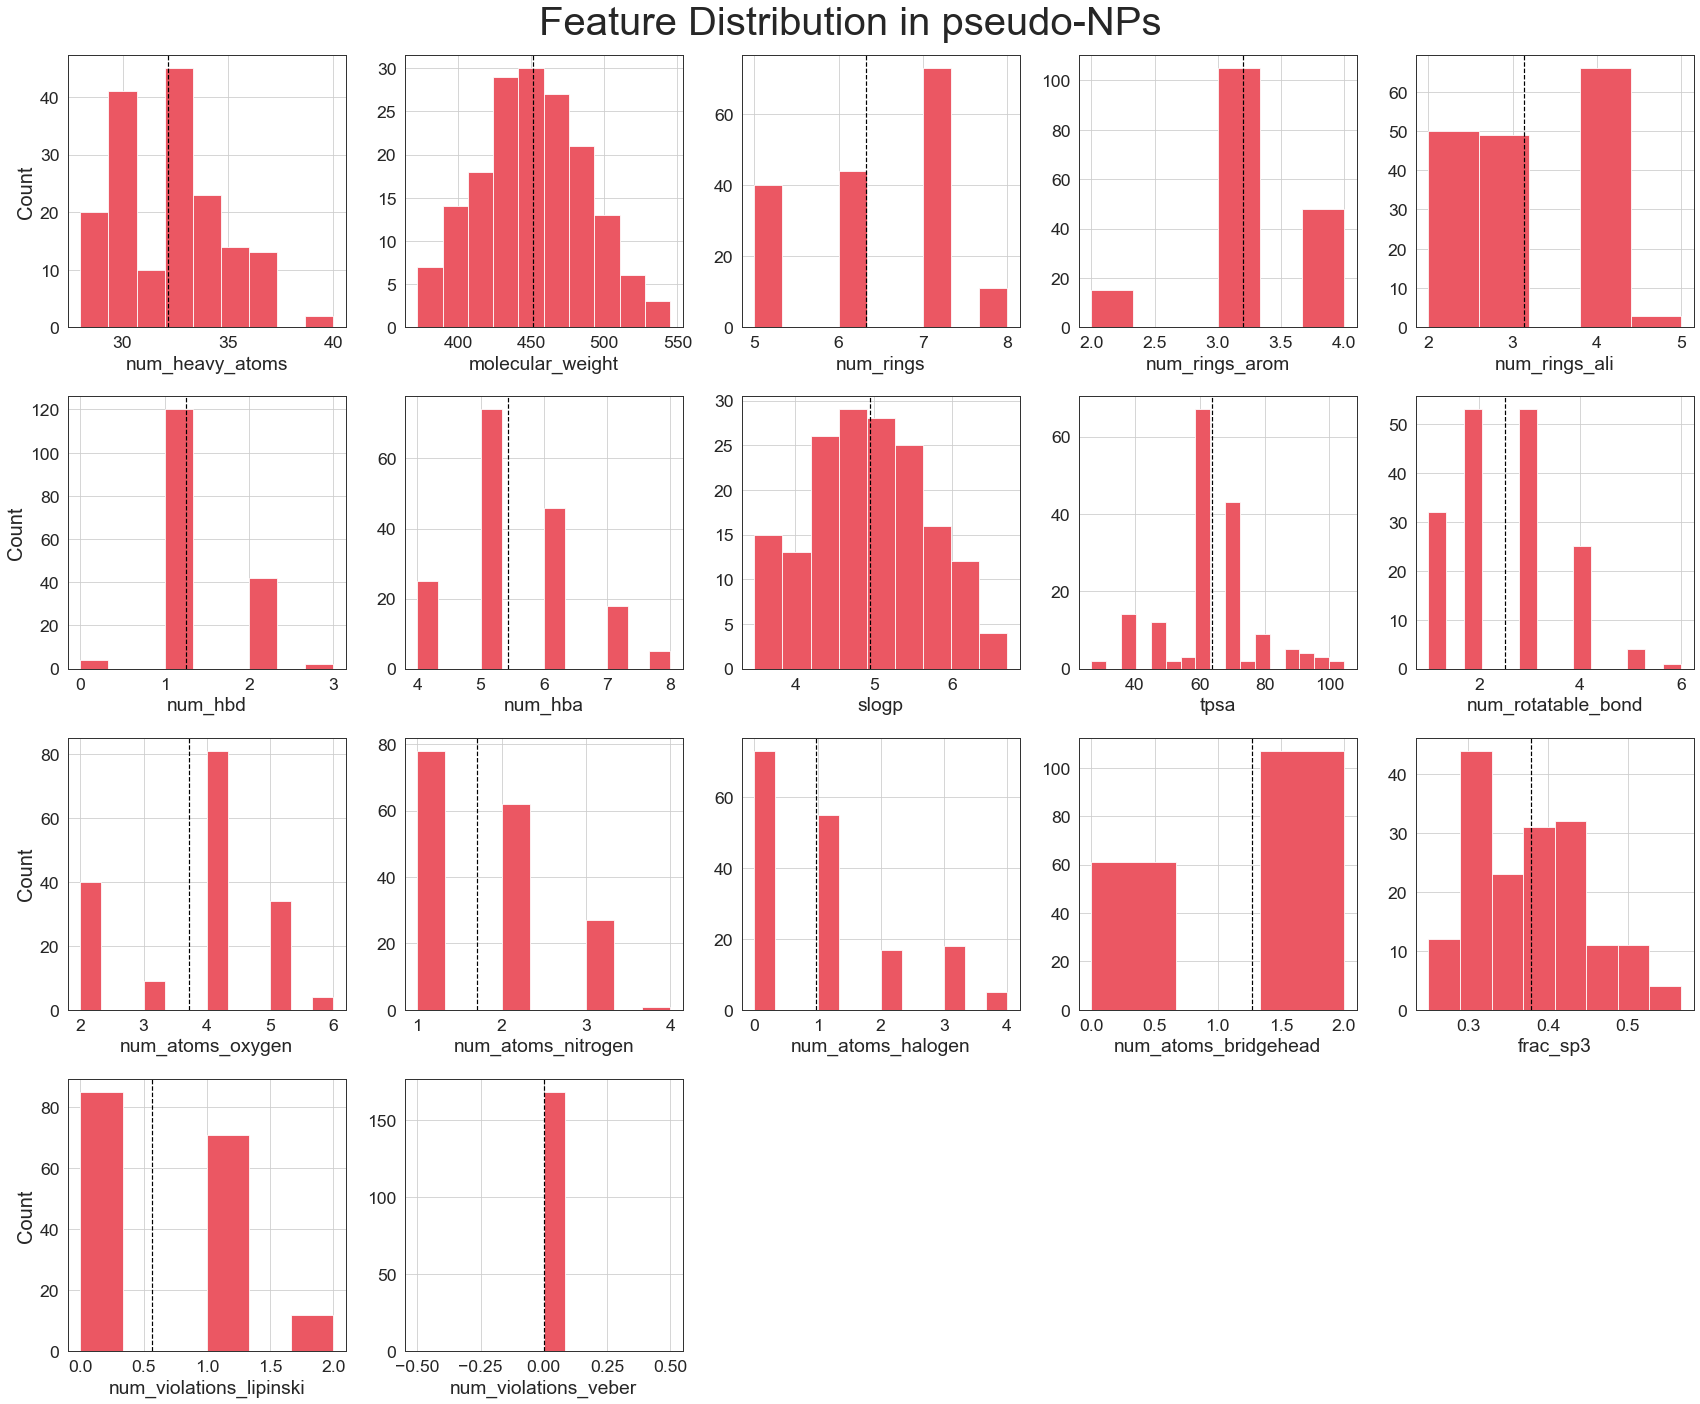

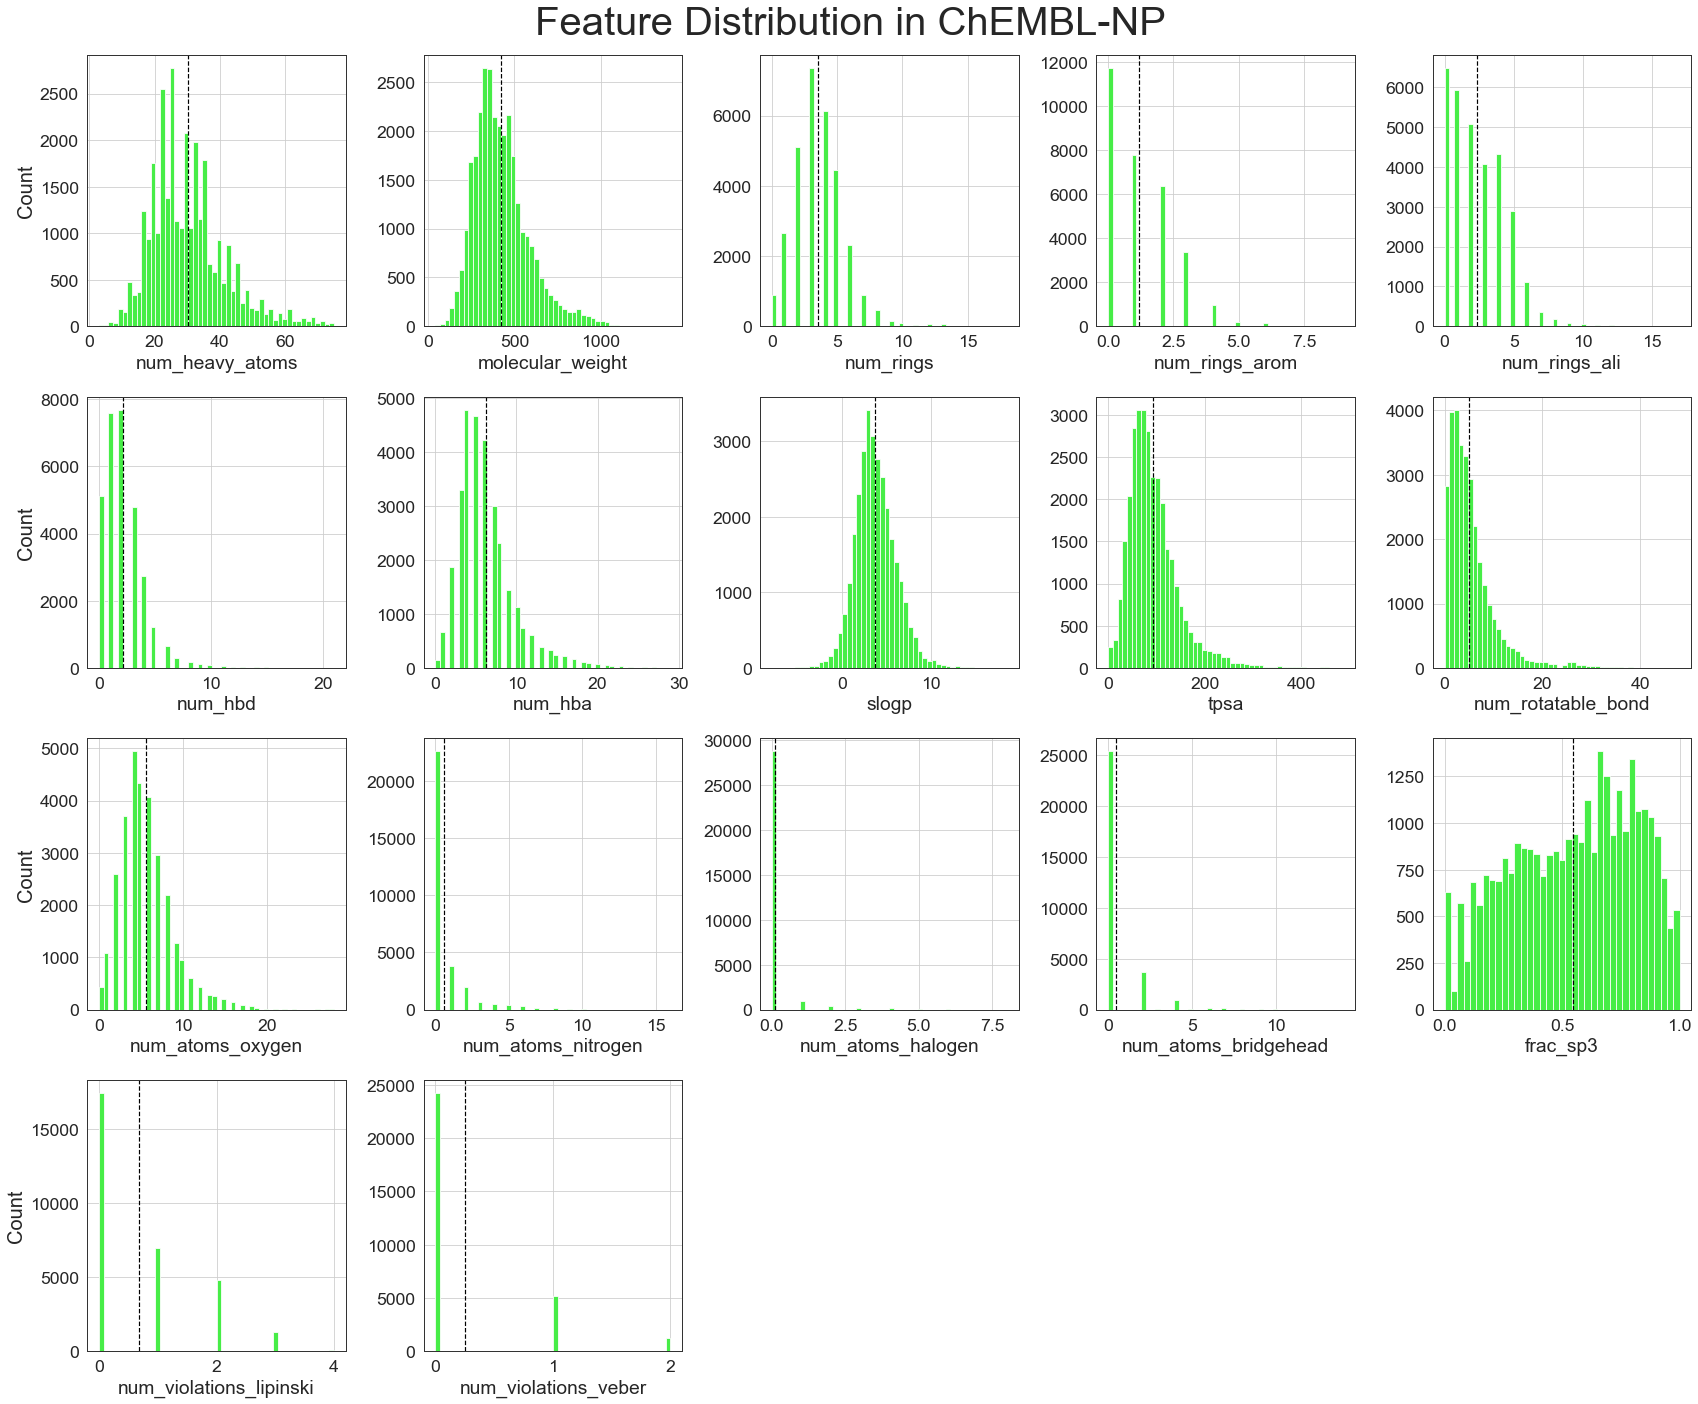

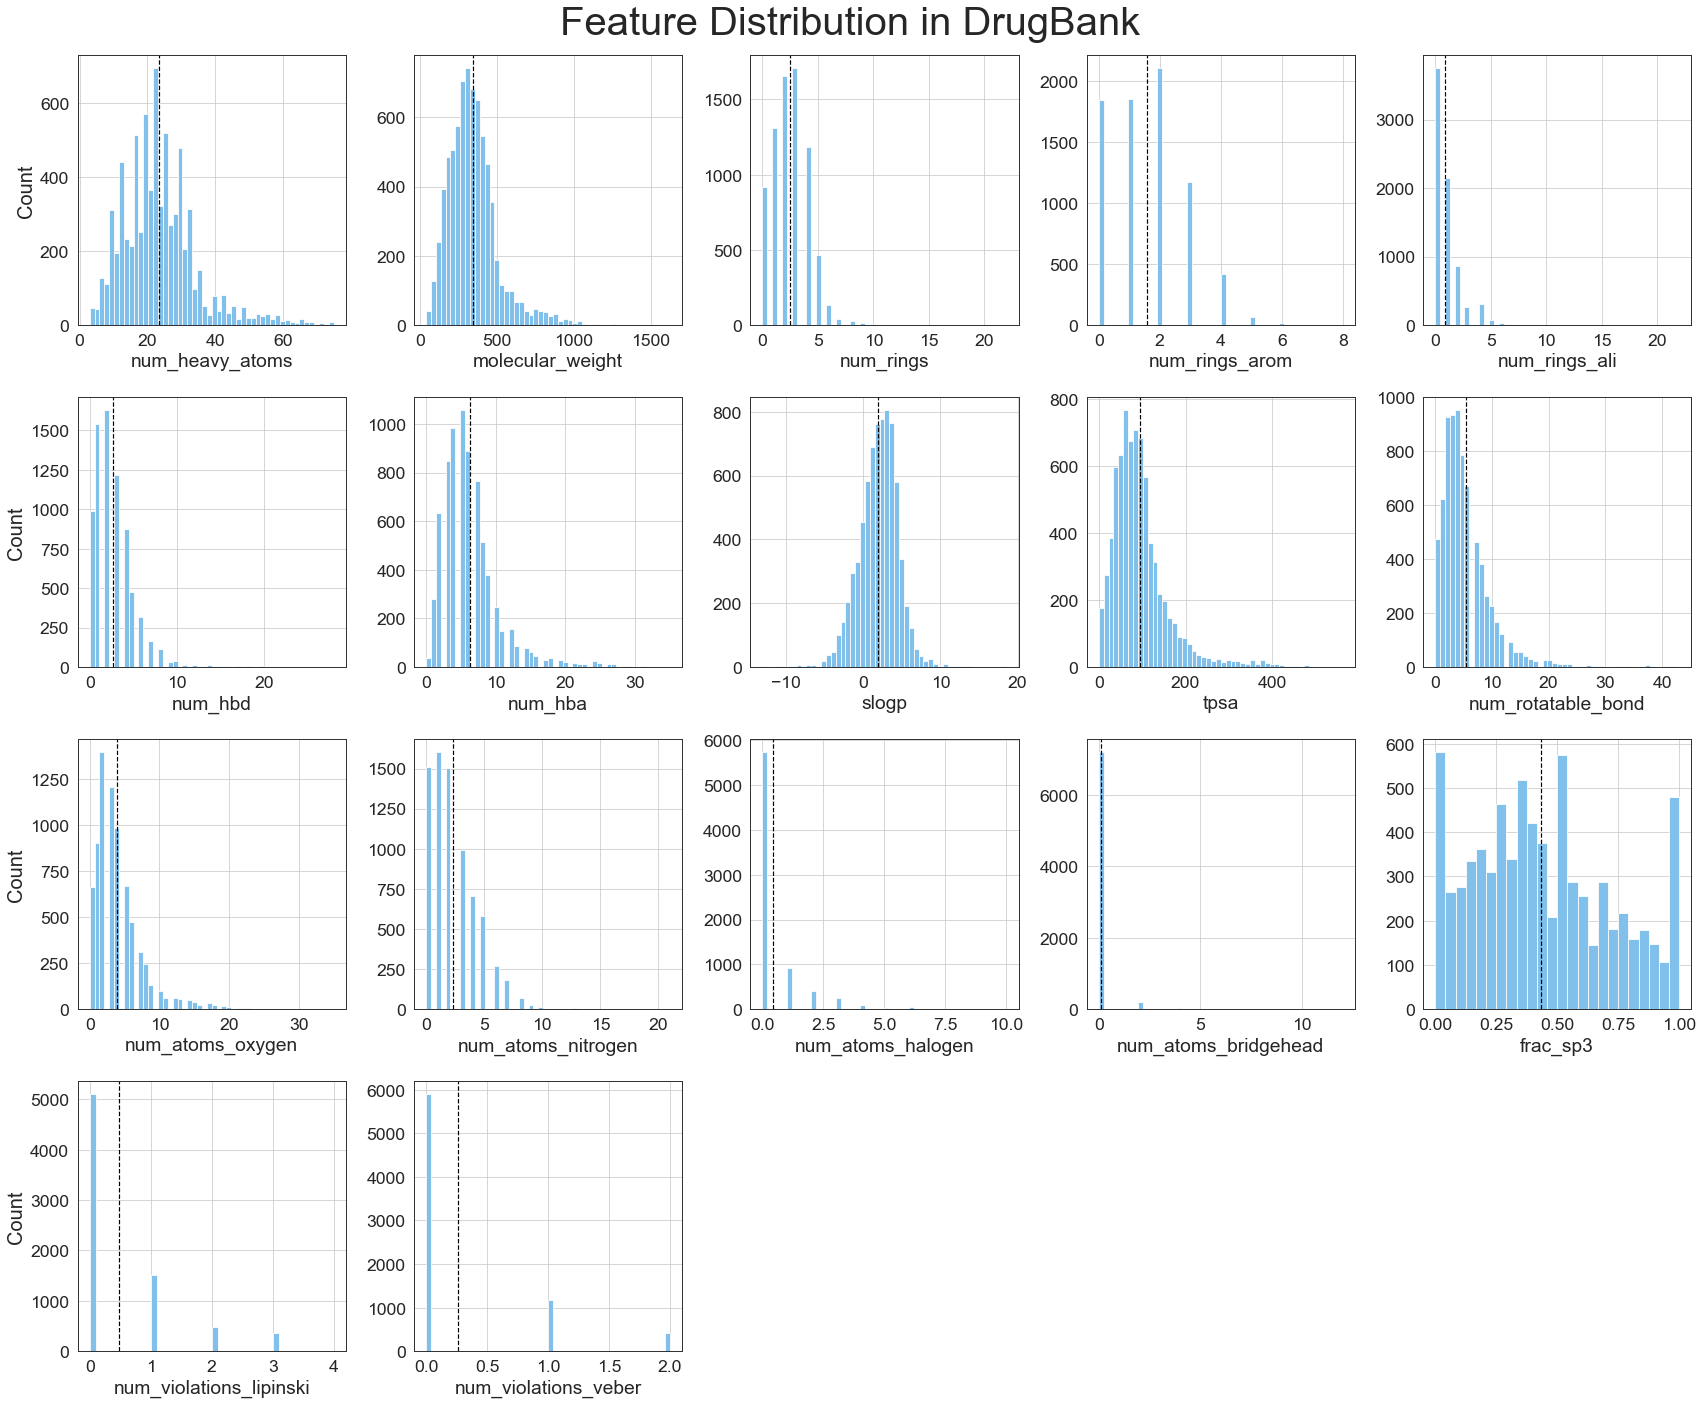

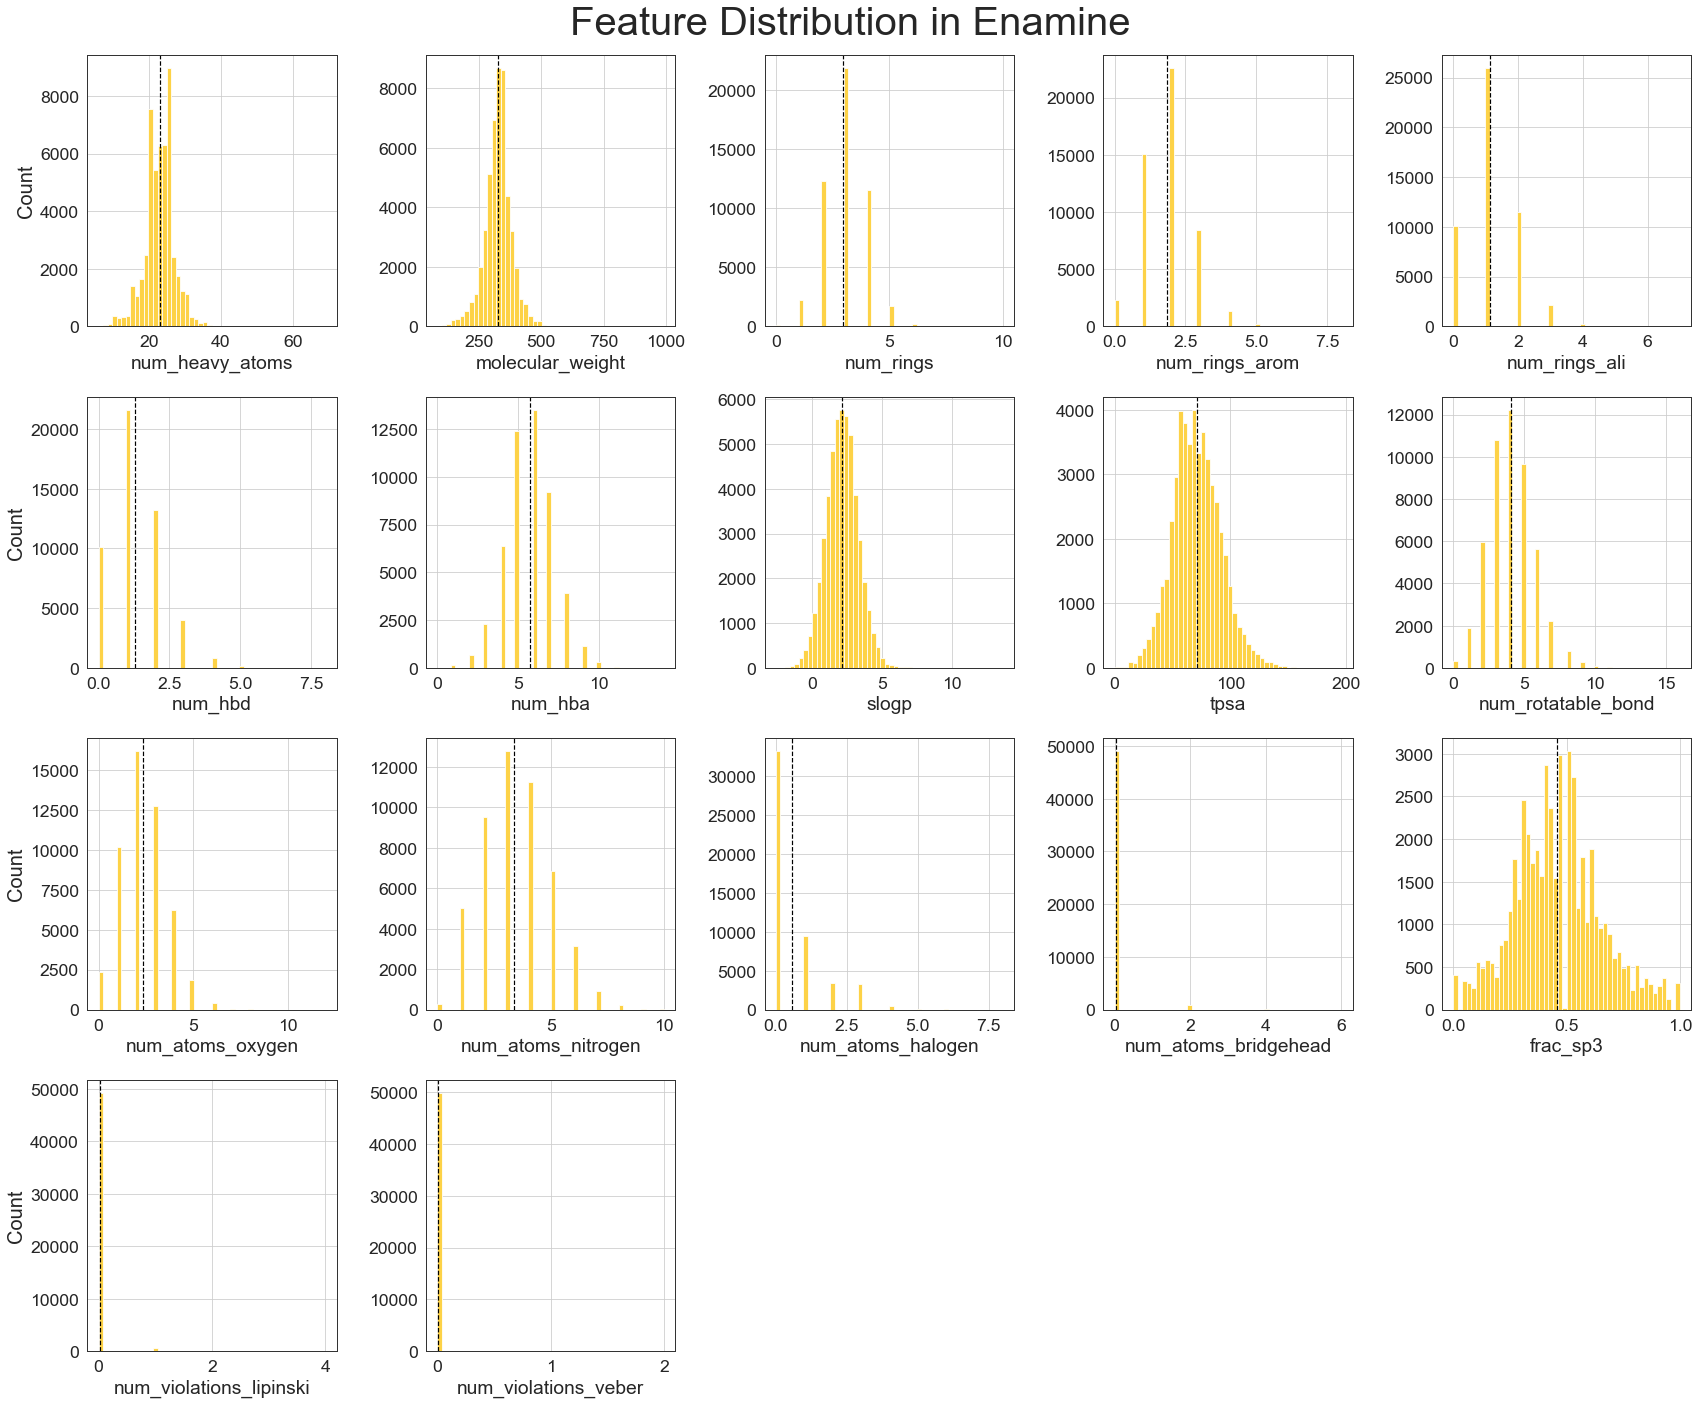

In [14]:
fig = u.plot_features(df_internal, 'pseudo-NPs', u.PALETTE[0])
fig.savefig('plots/features_internal.png', dpi=600)
fig = u.plot_features(df_chemblnp, 'ChEMBL-NP', u.PALETTE[1])
fig.savefig('plots/features_chemblnp.png', dpi=600)
fig = u.plot_features(df_drugbank, 'DrugBank', u.PALETTE[2])
fig.savefig('plots/features_drugbank.png', dpi=600)
fig = u.plot_features(df_enamine, 'Enamine', u.PALETTE[3])
fig.savefig('plots/features_enamine.png', dpi=600)